# Subway Locations in USA 🍔
_____

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [21]:
import folium
from folium import plugins

In [22]:
df = pd.read_csv('subway_locations_in_us.csv')

In [23]:
df.head()

,Unnamed: 0,title,address_1,address_2,open_hours,city,state,postal_code,latitude,longitude
0,0,Tikahtnu Commons S/C,1118 N Muldoon Rd,Suite 115,Closed Today 10:30 AM - 7:00 PM 10:30 AM - ...,Anchorage,AK,99504,61.2037,-149.7447
1,1,1307 W Northern Lights,1307 W Northern Lights,NaN,9:00 AM - 9:00 PM 9:00 AM - 9:00 PM 9:00 AM -...,Anchorage,AK,99503,61.1900,-149.8938
2,2,1330 Huffman Rd,1330 Huffman Rd,NaN,8:00 AM - 10:00 PM 8:00 AM - 10:00 PM 8:00 AM...,Anchorage,AK,99515,61.1194,-149.8974
3,3,2715 E. Tudor Road,2715 E. Tudor Road,NaN,8:00 AM - 10:00 PM 8:00 AM - 10:00 PM 8:00 AM...,Anchorage,AK,99507,61.1535,-149.8289
4,4,Alaska Regional Hospital,2801 Debarr Rd,NaN,Closed Today Closed Today Closed Today C...,Anchorage,AK,99508,61.2060,-149.8101


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22645 entries, 0 to 22644
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   22645 non-null  int64  
 1   title        22636 non-null  object 
 2   address_1    22645 non-null  object 
 3   address_2    6998 non-null   object 
 4   open_hours   22644 non-null  object 
 5   city         22645 non-null  object 
 6   state        22645 non-null  object 
 7   postal_code  22645 non-null  int64  
 8   latitude     22633 non-null  float64
 9   longitude    22633 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.7+ MB


In [25]:
df.isnull().sum()

Unnamed: 0         0
title              9
address_1          0
address_2      15647
open_hours         1
city               0
state              0
postal_code        0
latitude          12
longitude         12
dtype: int64

### Visualizing the Data

Let's check Subway Restaurants per state

Text(0.5, 1.0, 'Top 10 States by the Amount of Restaurants')

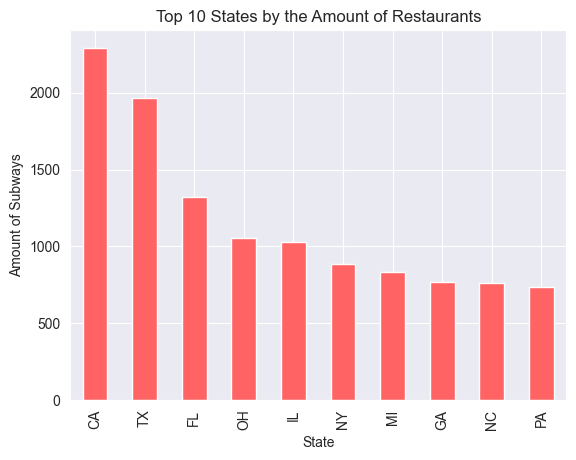

In [26]:
sns.set_style('darkgrid')

df.groupby('state').count().sort_values('title', ascending=False)['title'].head(10).plot(kind='bar', color='#FF6363')
plt.xlabel('State')
plt.ylabel('Amount of Subways')
plt.title('Top 10 States by the Amount of Restaurants')


Now We'll do the but per city

Text(0.5, 1.0, 'Top 10 Cities by the Amount of Restaurants')

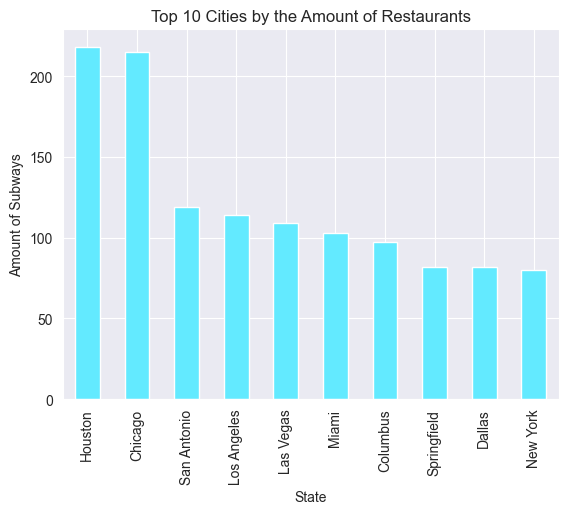

In [27]:
df.groupby('city').count().sort_values('title', ascending=False)['title'].head(10).plot(kind='bar', color='#63EAFF')
plt.xlabel('State')
plt.ylabel('Amount of Subways')
plt.title('Top 10 Cities by the Amount of Restaurants')

Let show this on map

In [28]:
import plotly.express as px

In [29]:
host_state = df.groupby('state').count()
fig = px.choropleth(host_state,
                    locations=host_state.index,
                    locationmode='USA-states',
                    color='title', 
                    hover_name=host_state.index,
                    )
fig.update_layout(
    title_text = 'State Rankings', 
    geo_scope='usa',  
)
fig.show()

### Dropping a pin on the exact locations

In [30]:
df_new = df.dropna()
df_new = df_new[(df_new.latitude.notnull())]
df_new = df_new[(df_new.latitude != -1) & (df_new.longitude != -1)]
df_new = df_new[~df_new.latitude.isna()].head(1500)

maps = folium.Map(location=[37.09024,-95.712891], titles="OpenStreetMap", zoom_start=4)
maps

for i in range(0, len(df_new)):
    folium.Marker(
        location=[df_new.iloc[i]['latitude'], df_new.iloc[i]['longitude']],
        popup = df_new.iloc[i]['address_1'],
    ).add_to(maps)

maps

In [31]:
maps = folium.Map(location=[37.09024,-95.712891], titles="OpenStreetMap", zoom_start=4)
maps

for i in range(0, len(df_new)):
    folium.Marker(
        location=[df_new.iloc[i]['latitude'], df_new.iloc[i]['longitude']],
        popup = df_new.iloc[i]['address_1'],
        icon=folium.Icon(color='red', icon='glyphicon-cutlery')
    ).add_to(maps)

maps